In [1]:
import pandas as pd

In [2]:
file = r'tvmarketing.csv'

advertising = pd.read_csv(file)

In [3]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [8]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [9]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [10]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

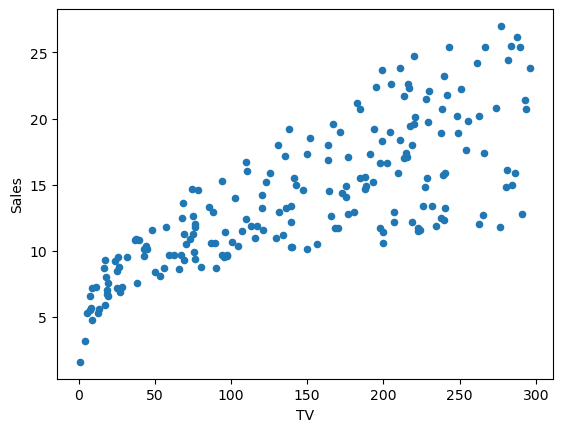

In [11]:
# Visualise the relationship between the features and the response using scatterplots
df.plot(x='TV',y='Sales',kind='scatter')

In [12]:
# Putting feature variable to X
X = advertising['TV']

# Print the first 5 rows
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [13]:
# Putting response variable to y
y = advertising['Sales']

# Print the first 5 rows
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

#Splitting Data into Training and Testing Sets

In [14]:
\

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=0000)

In [15]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [16]:
train_test_split      

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [18]:
#It is a general convention in scikit-learn that observations are rows, while features are columns. 
#This is needed only when you are using a single feature; in this case, 'TV'.

import numpy as np
#Simply put, numpy.newaxis is used to increase the dimension of the existing array by one more dimension,
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

C:\Users\Siddhanth\AppData\Local\Temp\ipykernel_27932\607821367.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]
C:\Users\Siddhanth\AppData\Local\Temp\ipykernel_27932\607821367.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


#Performing Linear Regression

In [20]:
# import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# Fit the model using lr.fit()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
# Print the intercept and coefficients
print(lr.intercept_)
print(lr.coef_)

7.310810165411681
[0.04581434]


## Predictions

In [22]:
# Making predictions on the testing set
y_pred = lr.predict(X_test)

In [23]:
type(y_pred)

numpy.ndarray

In [24]:
y_test.shape # cheek the shape to generate the index for plot

(60,)

Text(0, 0.5, 'Sales')

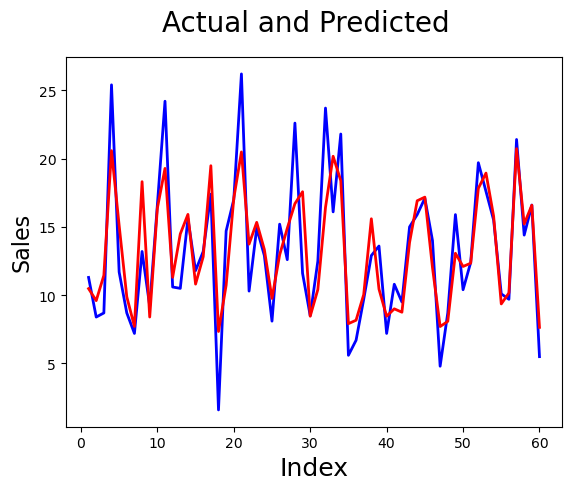

In [25]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                       # Y-label

Text(0, 0.5, 'ytest-ypred')

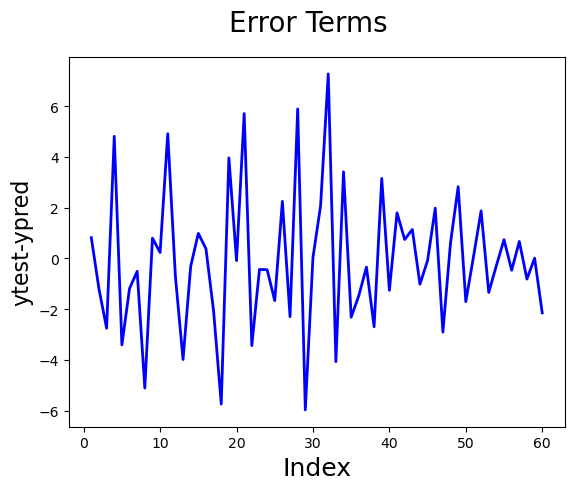

In [26]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [28]:
r_squared = r2_score(y_test, y_pred)

In [29]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.497479593464674
r_square_value : 0.725606346597073


In [30]:
# this mse =7.49 means that this model is not able to match the 7.49 percent of the values
# r2 means that your model is 72% is accurate on test data .

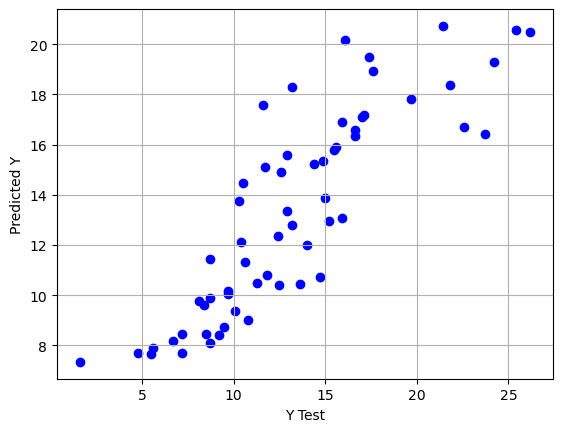

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()
